In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
rc('font', weight='bold')
%matplotlib inline

In [6]:
t = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun'] # 요일
hday = [i.replace(' ','-') for i in [
'2020 06 06',
]]

sales_test = pd.read_excel('test/sales_test.xlsx', skiprows=1)
sales_test.columns = ['datetime', 'duration', 'mthcode', 'pdcode', 'pdname', 'pdgroup','unitp', 'sales']
sales_test['datetime'] = pd.to_datetime(sales_test['datetime'])
sales_test['mth'] = sales_test['datetime'].dt.month
sales_test['day'] = sales_test['datetime'].dt.day
sales_test['hour'] = sales_test['datetime'].dt.hour
sales_test.loc[sales_test['hour']==0, 'hour'] = 24 # 00h -> 24h
sales_test['minute'] = sales_test['datetime'].dt.minute
sales_test['date'] = sales_test['datetime'].apply(lambda x: str(x).split()[0])
sales_test['wday'] = sales_test['datetime'].apply(lambda x: t[x.weekday()])
sales_test['hday'] = sales_test['wday'].apply(lambda x: 0)
sales_test.loc[(sales_test['date'].isin(hday)) | (sales_test['wday'].isin(['sat', 'sun'])), 'hday'] = 1
sales_test['date_pk'] = sales_test['date'].apply(lambda x: x[-5:])
sales_test['date_pk'] = sales_test['date_pk'] + ' '+ sales_test['wday']
sales_test['pd_pk'] = sales_test['pdgroup'].astype('str') + sales_test['mthcode'].astype('str')
sales_test.head()

,datetime,duration,mthcode,pdcode,pdname,pdgroup,unitp,sales,mth,day,hour,minute,date,wday,hday,date_pk,pd_pk
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,6,1,6,20,2020-06-01,mon,0,06-01 mon,의류100650
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,6,1,6,40,2020-06-01,mon,0,06-01 mon,의류100650
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,6,1,7,0,2020-06-01,mon,0,06-01 mon,의류100650
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,6,1,7,20,2020-06-01,mon,0,06-01 mon,속옷100445
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,6,1,7,40,2020-06-01,mon,0,06-01 mon,속옷100445


In [9]:
sales_train = pd.read_excel('train/sales_train.xlsx', skiprows=1)

t = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun'] # 요일
hday = [i.replace(' ','-') for i in [
'2019 01 01',
'2019 02 04',
'2019 02 05',
'2019 02 06',
'2019 03 01',
'2019 05 06',
'2019 06 06',
'2019 08 15',
'2019 09 12',
'2019 08 13',
'2019 10 03',
'2019 10 09',
'2019 12 25',
'2020 01 01',]]

sales_train.columns = ['datetime', 'duration', 'mthcode', 'pdcode', 'pdname', 'pdgroup','unitp', 'sales']
sales_train['datetime'] = pd.to_datetime(sales_train['datetime'])
sales_train['mth'] = sales_train['datetime'].dt.month
sales_train['day'] = sales_train['datetime'].dt.day
sales_train['hour'] = sales_train['datetime'].dt.hour
sales_train.loc[sales_train['hour']==0, 'hour'] = 24 # 00h -> 24h
sales_train['minute'] = sales_train['datetime'].dt.minute
sales_train['date'] = sales_train['datetime'].apply(lambda x: str(x).split()[0])
sales_train['wday'] = sales_train['datetime'].apply(lambda x: t[x.weekday()])
sales_train['hday'] = sales_train['wday'].apply(lambda x: 0)
sales_train.loc[(sales_train['date'].isin(hday)) | (sales_train['wday'].isin(['sat', 'sun'])), 'hday'] = 1
sales_train['date_pk'] = sales_train['date'].apply(lambda x: x[-5:])
sales_train['date_pk'] = sales_train['date_pk'] + ' '+ sales_train['wday']
sales_train['pd_pk'] = sales_train['pdgroup'].astype('str') + sales_train['mthcode'].astype('str')
sales_train.head()

,datetime,duration,mthcode,pdcode,pdname,pdgroup,unitp,sales,mth,day,hour,minute,date,wday,hday,date_pk,pd_pk
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,2019-01-01,tue,1,01-01 tue,의류100346
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,2019-01-01,tue,1,01-01 tue,의류100346
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,2019-01-01,tue,1,01-01 tue,의류100346
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,2019-01-01,tue,1,01-01 tue,의류100346
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,2019-01-01,tue,1,01-01 tue,의류100346


In [10]:
test = sales_test.drop_duplicates(subset='pd_pk', keep='first').pivot_table(values = 'pd_pk', index = 'pdgroup', aggfunc = 'count')

In [51]:
n = pd.DataFrame(pd.Series([0]*len(test.index), index=[test.index]))
n = n.reset_index()
a = pd.merge(pd.DataFrame(pd.Series([0]*len(test.index), index=[test.index]), columns = ['none']), li[0], on='pdgroup', how = 'outer').fillna(0)
for i in range(1, len(li)):
    a = pd.merge(a, li[i], on='pdgroup', how = 'outer').fillna(0)
a

,pdgroup,none,1,2,3,4,5,6,7,8,9,10,11,12
0,가구,0,0.0,2.0,5.0,4,4,3,3,2,6,6,6,4.0
1,가전,0,8.0,5.0,8.0,7,10,7,3,7,7,5,4,5.0
2,건강기능,0,5.0,5.0,8.0,6,4,8,6,9,10,13,12,10.0
3,농수축,0,28.0,17.0,15.0,14,16,17,21,34,34,29,38,37.0
4,무형,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0
5,생활용품,0,7.0,10.0,15.0,10,10,10,8,15,18,26,26,20.0
6,속옷,0,18.0,16.0,20.0,24,21,23,28,25,16,17,17,18.0
7,의류,0,22.0,13.0,23.0,18,27,35,34,21,22,27,26,34.0
8,이미용,0,5.0,5.0,5.0,8,5,4,6,9,12,12,13,16.0
9,잡화,0,7.0,9.0,13.0,11,15,14,17,26,22,22,17,17.0


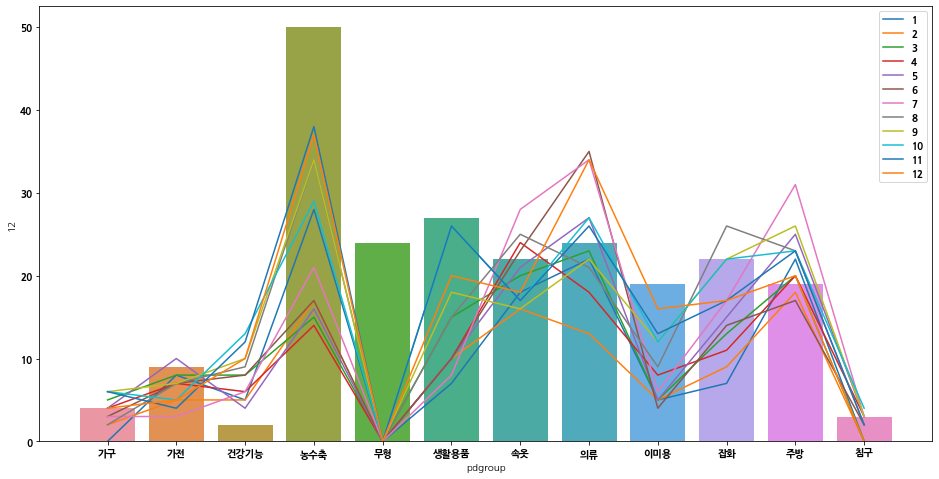

In [58]:
plt.figure(figsize = (16, 8))
for i in range(len(a.iloc[:,2:].columns)):
    sns.barplot(x = test.index, y = 'pd_pk',data=test)
    sns.lineplot(x = a['pdgroup'], y = a.iloc[:,2:].columns[i], data= a.iloc[:,2:], label= i+1)
plt.savefig('viz/test_train.png', dpi = 500)